# Exploring and preprocessing

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv('./train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic = titanic.drop('Cabin', axis= 1)
#Too much NA values to be handled in a proper way that does not affect the data integrity
titanic['Embarked'] = titanic[['Embarked']].fillna(titanic['Embarked'].mode()[0])
#fill values with mode
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# How does sex affect the survival rate?

In [4]:
male_survivors_rate = round(titanic[(titanic['Sex'] == 'male') & titanic['Survived'] == 1].shape[0] / titanic[titanic['Sex'] == 'male'].shape[0], 2)
male_survivors_rate * 100

19.0

In [5]:
female_survivors_rate = round(titanic[(titanic['Sex'] == 'female') & titanic['Survived'] == 1].shape[0] / titanic[titanic['Sex'] == 'female'].shape[0], 2)
female_survivors_rate * 100

74.0

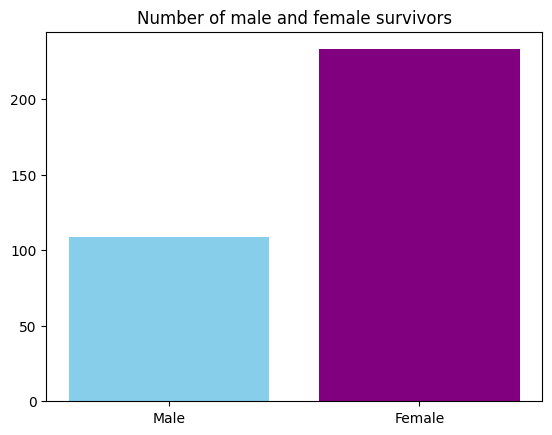

In [6]:
females_survivors = titanic[(titanic['Sex'] == 'female') & titanic['Survived'] == 1].shape[0]
male_survivors = titanic[(titanic['Sex'] == 'male') & titanic['Survived'] == 1].shape[0]
plt.bar(['Male','Female'], [male_survivors, females_survivors], color = ['skyblue', 'purple'])
plt.title('Number of male and female survivors')
plt.show()

### A final thought is that sex affect the survival rate too much as the difference between the ratio of males that survived and the ratio of females is obvious

# Does the age affect the survival rate?

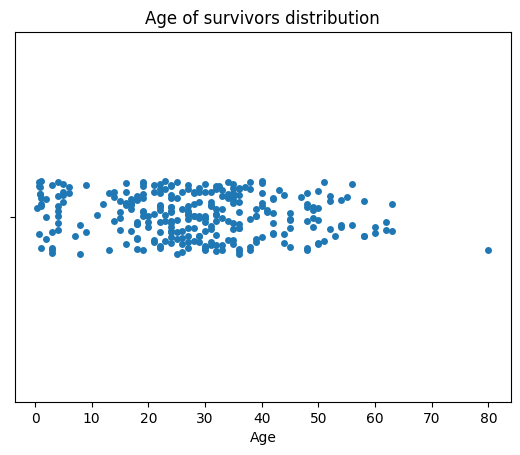

In [7]:
age_and_survival = titanic[titanic['Survived'] == 1].dropna(subset= 'Age')
# NUMBERS THAT HAS NO VALUES ARE DROPPED HERE USING THE DROPNA FUNCTION IN THE PREV LINE 
sns.stripplot(x= age_and_survival['Age'], jitter= True)
plt.title('Age of survivors distribution')
plt.show()

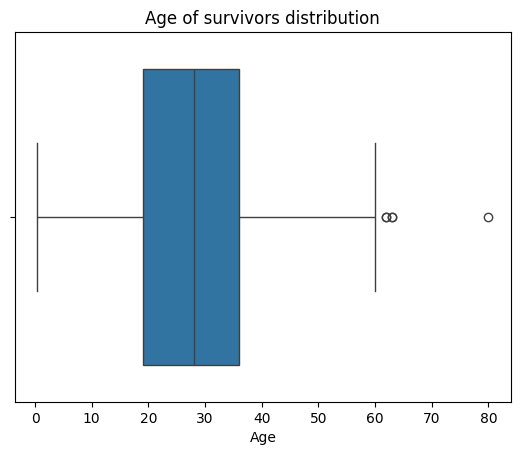

In [8]:
sns.boxplot(data= age_and_survival , x= 'Age')
plt.title('Age of survivors distribution')
plt.show()

In [9]:
morethan_60_ratio = age_and_survival[age_and_survival['Age'] > 60].shape[0]/titanic[titanic['Age'] > 60].shape[0]
morethan_60_ratio * 100

22.727272727272727

In [10]:
biggest_ratio_assumed = age_and_survival[(age_and_survival['Age'] >= 20) & (age_and_survival['Age'] < 40)].shape[0]/titanic[(titanic['Age'] >= 20) & (titanic['Age'] < 40)].shape[0]
biggest_ratio_assumed * 100

38.759689922480625

In [11]:
mid_ratio_assumed = age_and_survival[age_and_survival['Age'] < 20].shape[0]/titanic[titanic['Age'] < 20].shape[0]
mid_ratio_assumed * 100

48.170731707317074

In [12]:
survival_ratio = age_and_survival[(age_and_survival['Age'] >= 40) & (age_and_survival['Age'] < 60)].shape[0]/titanic[(titanic['Age'] >= 40) & (titanic['Age'] < 60)].shape[0]
survival_ratio * 100

39.416058394160586

### From what we can see the people with age from 20 to late 30s had the bigger survival numbers but the bigger survival rates are for the people less than 20 years old while people from 40 to 59 comes after them people from 20s to late 30s comes after them and people older than 60 has the lowest rate

# Does the pclass affect the survival rate?

In [13]:
pclass= titanic[['Survived' , 'Pclass']]
pclass_vals= pclass['Pclass'].unique()
pclass_vals

array([3, 1, 2])

In [14]:
pclass_and_survivors = pclass.groupby(by= 'Pclass')['Survived']
pclass_and_survivors_rates = pclass_and_survivors.value_counts(normalize= True)
pclass_and_survivors_rates


Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64

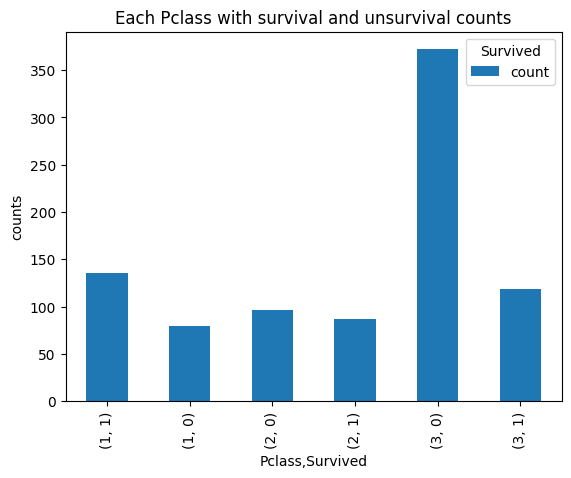

In [15]:
survival_vals = pclass_and_survivors.value_counts()
survival_vals.plot(kind= 'bar' , stacked= False)
plt.title('Each Pclass with survival and unsurvival counts')
plt.ylabel('counts')
plt.legend(title= 'Survived')

### pclass 3 had the lowest number of survivors 24% while the pclass 1 had the highest number of survivors 63% (being in pclass 3 makes the unsurvival rate too big)

# Fares and survival ratios

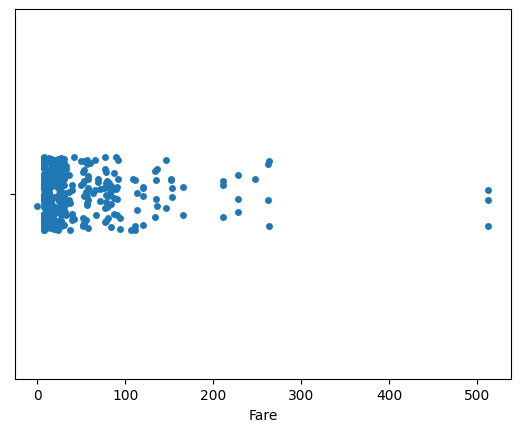

In [16]:
fares_and_survived = titanic[titanic['Survived'] == 1][['Fare', 'Survived']].dropna(subset=['Fare'])
sns.stripplot(x= fares_and_survived['Fare'], jitter= True)
plt.show()

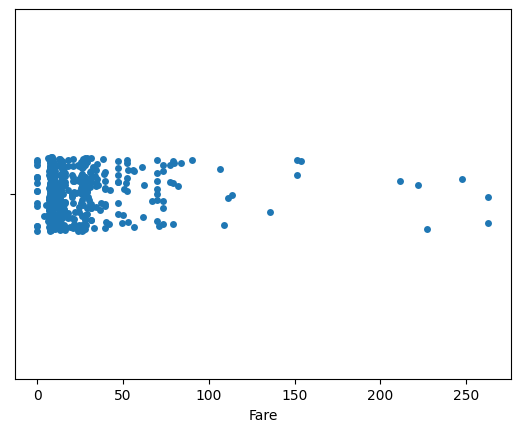

In [17]:
fares_and_unsurvived= titanic[titanic['Survived'] == 0][['Fare', 'Survived']].dropna(subset=['Fare'])
sns.stripplot(x= fares_and_unsurvived['Fare'], jitter= True)
plt.show()

<Axes: >

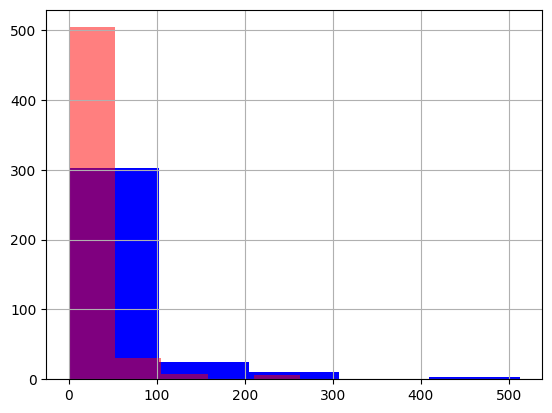

In [18]:
fares_and_survived['Fare'].hist(bins= 5, color= 'Blue')
fares_and_unsurvived['Fare'].hist(bins= 5, alpha= 0.5, color= 'Red')

### The fares are more likely to have a weak relationship with the survival rate

# How many survived

In [19]:
people_survived_number= titanic[titanic['Survived'] == 1].shape[0]
people_survived_ratio = round(titanic[titanic['Survived'] == 1].shape[0] / titanic.shape[0], 2) * 100
print(people_survived_number, people_survived_ratio)


342 38.0


# embarked and survival ratio

In [20]:
embarked_vals= titanic['Embarked'].dropna().unique().tolist()
embarked_vals

['S', 'C', 'Q']

In [21]:
embarked_ratios = {}
survived = titanic[titanic['Survived'] == 1].fillna(titanic['Embarked'].mode())
# THE EMBARKED HAS ONLY 2 MISSING VALUES FROM 891 SO FILLING THOSE VALUES WITH THE MODE WILL DO THE JOB WITHOUT LOWERING THE DATA INTEGRITY
S_ratio = round(survived[survived['Embarked'] == embarked_vals[0]].shape[0] / survived.shape[0], 2) * 100
embarked_ratios[embarked_vals[0]] = S_ratio
S_ratio

64.0

In [22]:
C_ratio = round(survived[survived['Embarked'] == embarked_vals[1]].shape[0] / survived.shape[0], 2) * 100
embarked_ratios[embarked_vals[1]] = C_ratio
C_ratio

27.0

In [23]:
Q_ratio = round(survived[survived['Embarked'] == embarked_vals[2]].shape[0] / survived.shape[0], 2) * 100
embarked_ratios[embarked_vals[2]] = Q_ratio
Q_ratio

9.0

In [24]:
print(embarked_ratios)

{'S': 64.0, 'C': 27.0, 'Q': 9.0}


### Higher chances got to the S embarked value

# Encoding splitting and dropping irrelevant columns

In [25]:
titanic['Sex'] = titanic['Sex'].apply(lambda sex: 0 if sex == 'male' else 1)
titanic['Sex'].head(15)
#encoding sex

0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    1
Name: Sex, dtype: int64

In [26]:
print(titanic.columns)
titanic = titanic.drop(columns= ['PassengerId', 'Ticket'])
print(titanic.columns)
#dropping columns that are not important

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
